# Introducing the exoplanet data analysis

Identifying potential exoplanet candidates based on kepler NASA observatory data. This data was kindly provided by the NASA.


First, import the libraries necessary to work with

In [2]:
import pandas as pd # pandas database reading
import numpy as np # numpy arrays to work with if needing to slice arrays 
import matplotlib.pyplot as plt 
# For better visualization of plots 
import seaborn as sns # originally prettyplot.lib

Let's read the data through the pandas library

In [4]:
planets = pd.read_csv("cumulative.csv")

A brief look at the table:


In [5]:
planets.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


Looking at the tail part of the data just for reference.. 

In [6]:
planets.tail()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
9559,9560,10031643,K07984.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,NaN,CANDIDATE,CANDIDATE,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385
9563,9564,10156110,K07989.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,0,1,...,-225.0,4.385,0.054,-0.216,1.193,0.410,-0.137,297.00977,47.121021,14.826


The kol_disposition seems to be the classification column which dictates whether the data in question does show planets or not, and the kol_score column quantitively dictates a threshold for whether the object in question is a planet or not

At this point, I will ignore the kol_slogg_error values but this can be explored when we need to fine tune the data for a more accurate planet classification program.

First, drop the columns except the disposition scores, kol_score, and the variable columns (koi_slogg, kol_srad, ra, dec and koi_kepmag) 

In [ ]:
croppedplannetdata = planets[['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_slogg', 'koi_srad','ra','dec', 'koi_kepmag']]

Make sure the data is cropped correctly. 

In [10]:
croppedplannetdata.head()

,koi_disposition,koi_pdisposition,koi_score,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,0.000,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,4.438,1.046,288.75488,48.226200,15.509


Make sure to delete every row with a potential NA in it. 

In [13]:
croppedplannetdata = croppedplannetdata.dropna(axis='rows')  # Delete rows with NAs


In [46]:
croppedplannetdata # Again, just double-checkingn the dat awe want to work with

,koi_disposition,koi_pdisposition,koi_score,koi_slogg,koi_srad,ra,dec,koi_kepmag
0,CONFIRMED,CANDIDATE,1.000,4.467,0.927,291.93423,48.141651,15.347
1,CONFIRMED,CANDIDATE,0.969,4.467,0.927,291.93423,48.141651,15.347
2,FALSE POSITIVE,FALSE POSITIVE,0.000,4.544,0.868,297.00482,48.134129,15.436
3,FALSE POSITIVE,FALSE POSITIVE,0.000,4.564,0.791,285.53461,48.285210,15.597
4,CONFIRMED,CANDIDATE,1.000,4.438,1.046,288.75488,48.226200,15.509
5,CONFIRMED,CANDIDATE,1.000,4.486,0.972,296.28613,48.224670,15.714
6,CONFIRMED,CANDIDATE,1.000,4.486,0.972,296.28613,48.224670,15.714
7,CONFIRMED,CANDIDATE,0.992,4.486,0.972,296.28613,48.224670,15.714
8,FALSE POSITIVE,FALSE POSITIVE,0.000,3.986,1.958,298.86435,42.151569,12.660
9,CONFIRMED,CANDIDATE,1.000,4.485,0.848,286.99948,48.375790,15.841


The matplotlib library unfortunately does not have the pairs function which pairs each column against each other to see whether there are obvious patterns. But the seaborn library has, and so, we shall use it here.

At first glance, it does not seem there is a difference between the classification columns of koi_disposition and koi_pdisposition, so I shall assume that any of these data can be used for classification markers


And now, the actual positive data, using colour coding from the koi_disposition column

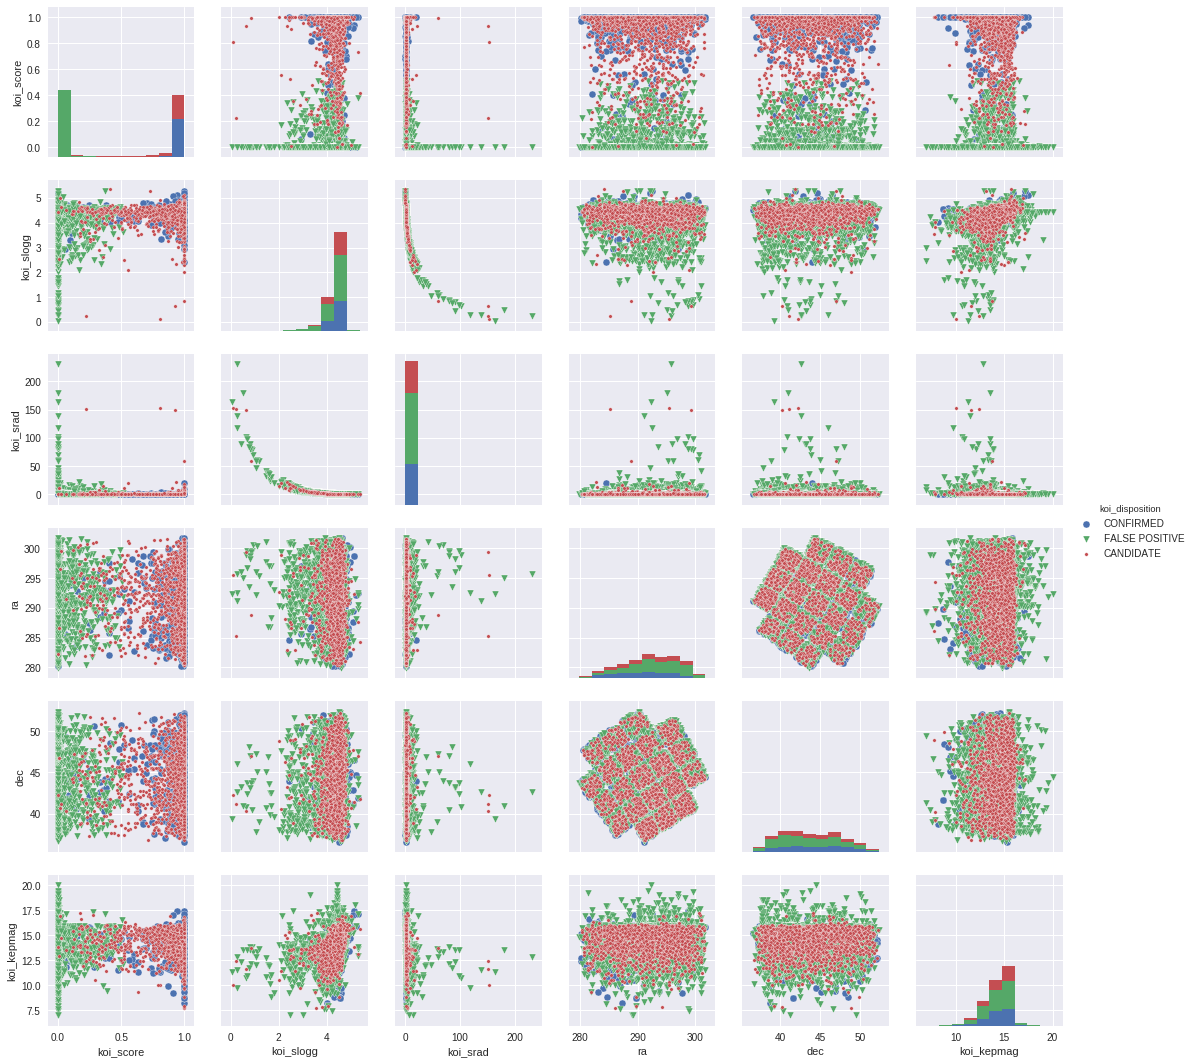

In [45]:
sns.pairplot(croppedplannetdata, hue= 'koi_disposition', markers=["o", "v", "."])
plt.show()


Just for information, I'll note what each column data stands for: 
koi_score - disposition score
koi_slogg - Stellar Surface Gravity
koi_srad - Stellar Radius
ra - RA
dec - DEC
koi_kepmag - Kepler-band

So at first glance, it seems that the threshold for a confirmed planet for the disposition score is 0.6 and above, although this does not seem to be a hard-set rule, given the presence of a confirmed planet near the score of 0.1 

For the observations with stellar surface gravity greater than 4, there seems to be a emerging trend band of data that may be considered as confirmed planets. With enough datapoints, my opinion is that this can be modelled through a 3-class logistic regression classifier.   

This is also apparent with the kepler band, where there hints of a patch of confirmed planets with the kepler band being lower than 10, which again, with more observations can be modelled into a 3-class logistic regression. 


Hence, from what I can see, the variables with the greatest predictive ability to find confirmed exoplanets seem to be the stellar surface gravity. This would be intuitive, as for example, we know that the sun is influenced by it's centre of gravity being slightly above it's surface from extremely high mass planets orbiting it such as Jupiter, and subsequently, will show a dependence. Although, this would depend on the exoplanet being massive enough to even show a 'blip on the radar'